In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('../Dataset/Data_Cleaned.csv')

In [35]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,job_state,same_state,age,python,R,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,MD,0,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90,85.0,FL,1,11,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,97,76.5,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,143,114.5,NY,1,23,1,0,0,0,1


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'age', 'python', 'R', 'spark', 'aws',
       'excel'],
      dtype='object')

In [37]:
#simplifying job title function
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
#simplifying seniority postion function
def seniority(x):
    if 'sr' in x.lower() or 'senior' in x.lower() or 'lead' in x.lower() or 'principal' in x.lower():
        return 'senior'
    elif 'jr' in x.lower() or 'junior' in x.lower():
        return 'jr'
    else:
        return 'na'

In [38]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [39]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [40]:
df['seniority'] = df['Job Title'].apply(seniority)

In [41]:
df.seniority.value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [42]:
# Fix Los Angeles State in Job State
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles'  else 'CA' )
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
IN     10
UT     10
AZ      9
MO      9
AL      8
KY      6
MI      6
DE      6
GA      6
IA      5
CT      5
LA      4
NE      4
OR      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

In [43]:
# Job Description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [44]:
# Competitor Counts
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp'].value_counts()



0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

In [45]:
df['min_salary'] = df.apply(lambda x:  x.min_salary*2 if x.hourly == 1 else x.min_salary,axis=1)
df['max_salary'] = df.apply(lambda x:  x.max_salary*2 if x.hourly == 1 else x.max_salary,axis=1)
df[df['hourly']==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [46]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,same_state,age,python,R,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.039084,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.272237,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.193925,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.445412,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


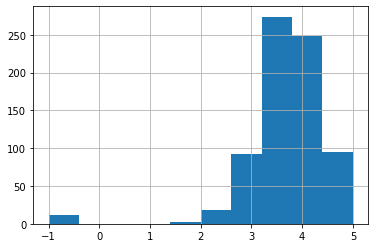

In [51]:
df.Rating.hist()

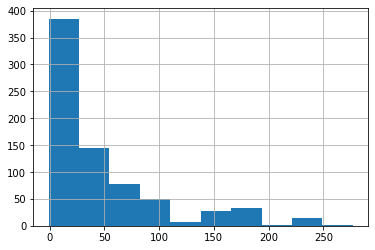

In [52]:
df.age.hist()

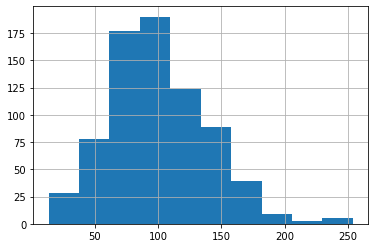

In [53]:
df.avg_salary.hist()

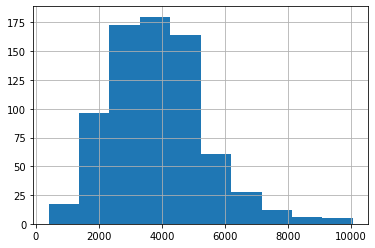

In [54]:
df.desc_len.hist()

In [55]:
df.corr()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,same_state,age,python,R,spark,aws,excel,desc_len,num_comp
Rating,1.000000,0.332927,-0.019531,-0.326122,-0.009573,0.027344,0.013492,0.085033,0.023162,0.144665,0.044580,0.156982,0.117049,-0.036466,-0.012281,0.027190
Founded,0.332927,1.000000,0.049313,-0.271925,-0.033999,0.006776,-0.015149,0.171512,0.139165,0.103183,0.051529,0.066978,-0.011123,-0.035567,0.083119,0.191265
hourly,-0.019531,0.049313,1.000000,0.081055,-0.203556,-0.276730,-0.356082,-0.067351,0.007847,-0.193487,-0.111821,-0.098530,-0.030315,-0.099897,-0.073194,-0.117265
employer provided,-0.326122,-0.271925,0.081055,1.000000,0.264413,0.067814,0.134833,-0.016532,-0.115711,-0.046262,-0.013981,-0.008775,0.034681,0.039481,0.038435,-0.048078
min_salary,-0.009573,-0.033999,-0.203556,0.264413,1.000000,0.940136,0.967765,-0.051097,0.002953,0.326910,0.237515,0.164671,0.168893,-0.075234,0.060420,0.076004
max_salary,0.027344,0.006776,-0.276730,0.067814,0.940136,1.000000,0.986862,-0.032784,0.034404,0.301481,0.214793,0.171317,0.170911,-0.067175,0.075634,0.086195
avg_salary,0.013492,-0.015149,-0.356082,0.134833,0.967765,0.986862,1.000000,-0.034641,0.019574,0.327796,0.232412,0.176559,0.171379,-0.057252,0.078808,0.093813
same_state,0.085033,0.171512,-0.067351,-0.016532,-0.051097,-0.032784,-0.034641,1.000000,-0.165792,0.006975,-0.022596,-0.053139,-0.065070,0.106026,0.062387,-0.102635
age,0.023162,0.139165,0.007847,-0.115711,0.002953,0.034404,0.019574,-0.165792,1.000000,-0.098626,0.049191,-0.102418,-0.033111,0.038846,0.164188,0.127482
python,0.144665,0.103183,-0.193487,-0.046262,0.326910,0.301481,0.327796,0.006975,-0.098626,1.000000,0.383832,0.347619,0.203221,-0.021519,0.019143,0.091470


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'age', 'python', 'R', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

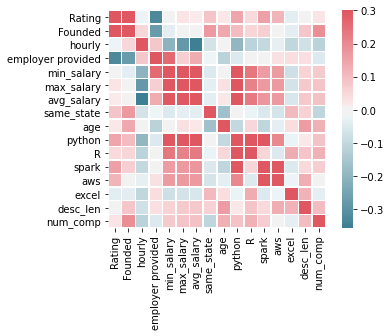

In [60]:
#Displaying correlation between variables using a seaborn heatmap
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5)
df.columns

In [73]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt',
            'job_state', 'same_state', 'python', 'R', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]


graph for Location total = 20


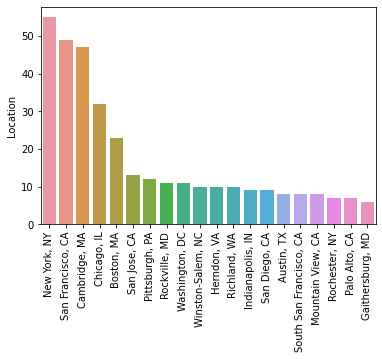

graph for Headquarters total = 20


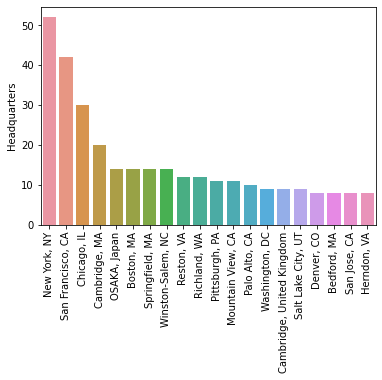

graph for Size total = 9


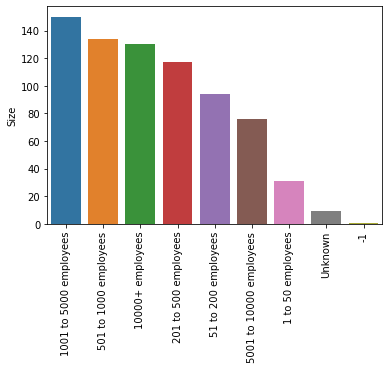

graph for Type of ownership total = 11


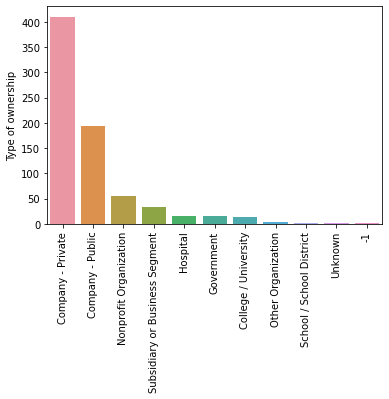

graph for Industry total = 20


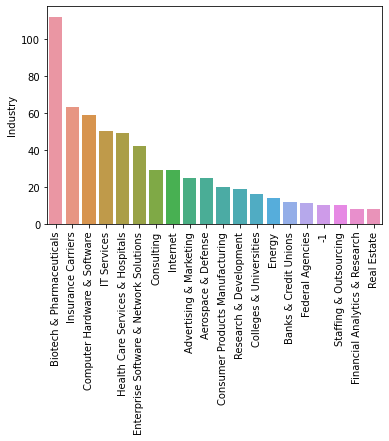

graph for Sector total = 20


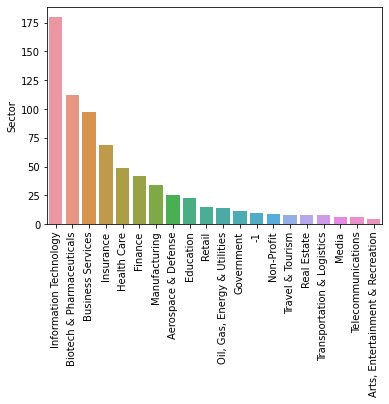

graph for Revenue total = 14


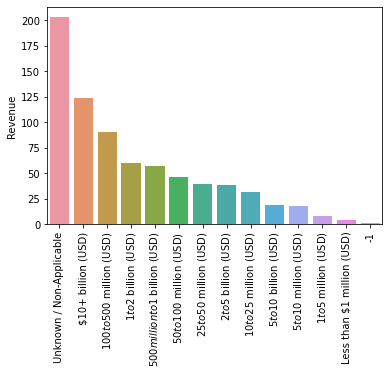

graph for company_txt total = 20


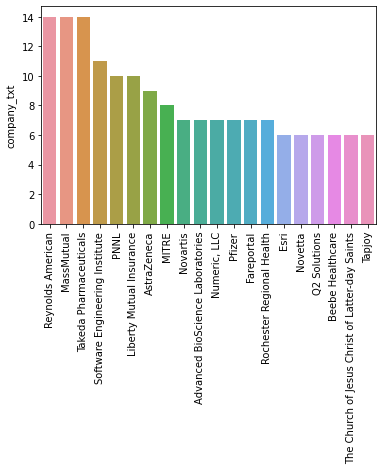

graph for job_state total = 20


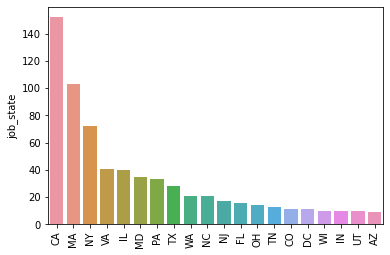

graph for same_state total = 2


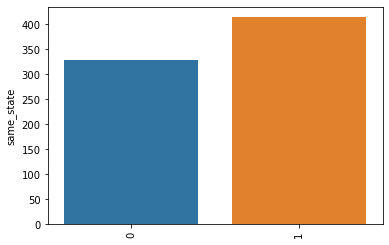

graph for python total = 2


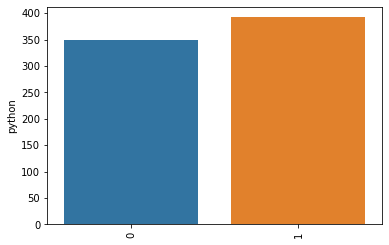

graph for R total = 2


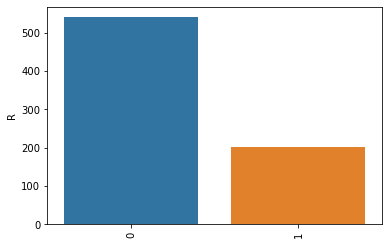

graph for spark total = 2


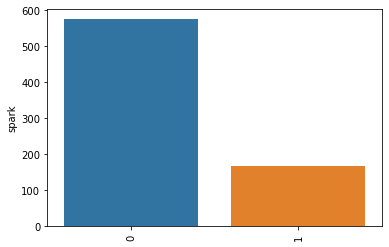

graph for aws total = 2


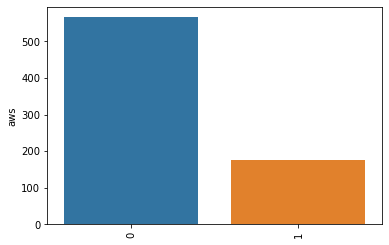

graph for excel total = 2


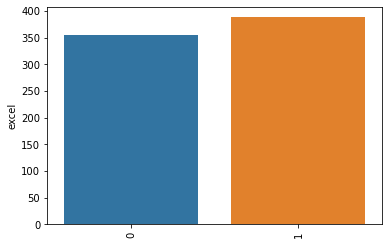

graph for job_simp total = 7


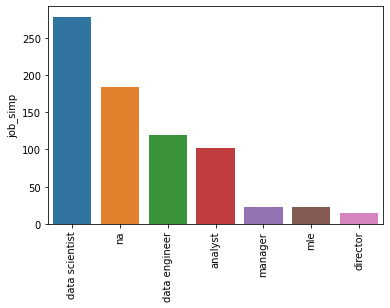

graph for seniority total = 3


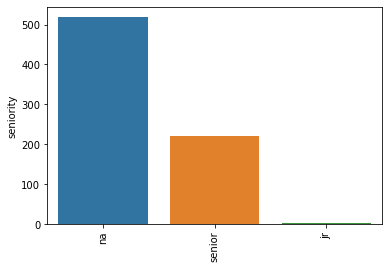

In [79]:
for i in df_cat.columns:
    cat_num = df[i].value_counts()[:20]
    print("graph for %s total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [80]:
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)

In [81]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n',''))

In [82]:
df['company_txt']


0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

graph for Location total = 20


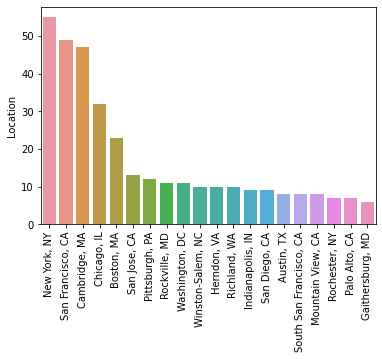

graph for Headquarters total = 20


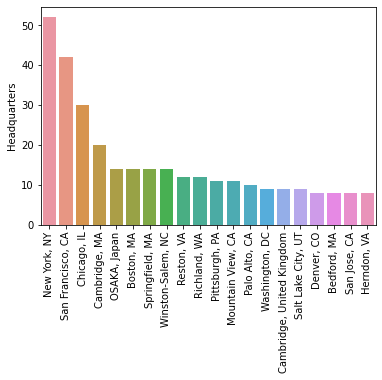

graph for company_txt total = 20


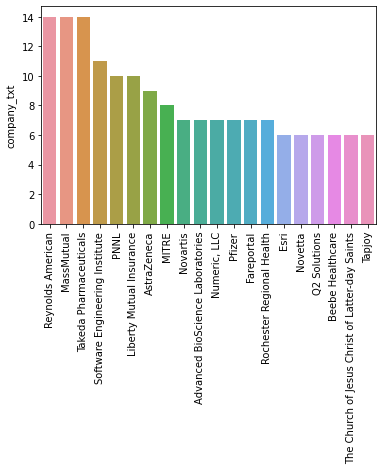

In [83]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df[i].value_counts()[:20]
    print("graph for %s total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [85]:
pd.pivot_table(df, index = ['job_simp','seniority'],values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [87]:
pd.pivot_table(df, index = 'job_state',values = 'avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [91]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)
pd.pivot_table(df, index = ['job_state','job_simp'],values = 'avg_salary', aggfunc ='count').sort_values('job_state',ascending=True)

avg_salary
job_state job_simp                  
AL        analyst                  5
          data engineer            1
          na                       2
AZ        analyst                  1
          data engineer            5
          data scientist           1
          na                       2
CA        mle                      5
          manager                  9
          na                      27
          data engineer           25
          analyst                 18
          data scientist          68
CO        analyst                  1
          data engineer            3
          data scientist           3
          mle                      1
          na                       3
CT        data scientist           2
          na                       3
DC        analyst                  2
          data engineer            4
          data scientist           5
DE        na                       6
FL        data engineer            3
          data scientist           7
          analyst                  6
GA        data scientist           3
          na                       3
IA        analyst                  2
          data engineer            3
ID        analyst                  2
IL        na                       6
          analyst                  3
          data engineer            8
          data scientist          15
          director                 6
          mle                      2
IN        na                       4
          data scientist           2
          data engineer            4
KS        mle                      3
KY        data scientist           2
          na                       4
LA        analyst                  1
          data engineer            2
          na                       1
MA        manager                  5
          director                 6
          na                      46
          data engineer           12
          analyst                  4
          data scientist          30
MD        data scientist          13
          na                      16
          analyst                  3
          data engineer            3
MI        data scientist           4
          manager                  2
MN        analyst                  1
          data engineer            1
MO        analyst                  2
          data scientist           3
          manager                  1
          na                       3
NC        data engineer            6
          data scientist           3
          na                      12
NE        na                       4
NJ        na                       1
          manager                  2
          director                 2
          data engineer            2
          data scientist           4
          analyst                  6
NM        data scientist           3
NY        analyst                 14
          data engineer            4
          data scientist          40
          mle                      2
          na                      12
OH        na                       3
          analyst                  4
          data scientist           7
OR        data scientist           3
          data engineer            1
PA        analyst                  8
          data engineer            1
          data scientist           6
          manager                  3
          mle                      7
          na                       8
RI        analyst                  1
SC        na                       1
TN        analyst                  2
          data engineer           10
          data scientist           1
TX        data scientist          13
          na                       7
          data engineer            8
UT        analyst                  4
          data engineer            3
          data scientist           3
VA        analyst                  6
          data engineer           10
          data scientist          18
          mle                 

In [94]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state',values = 'avg_salary' ).sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [99]:
df_pivots = df[['Rating','Industry','Sector','num_comp','Revenue','hourly','employer provided','python','R','spark','aws','excel','desc_len','Type of ownership','avg_salary']]

In [102]:
for i in df_pivots:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [105]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

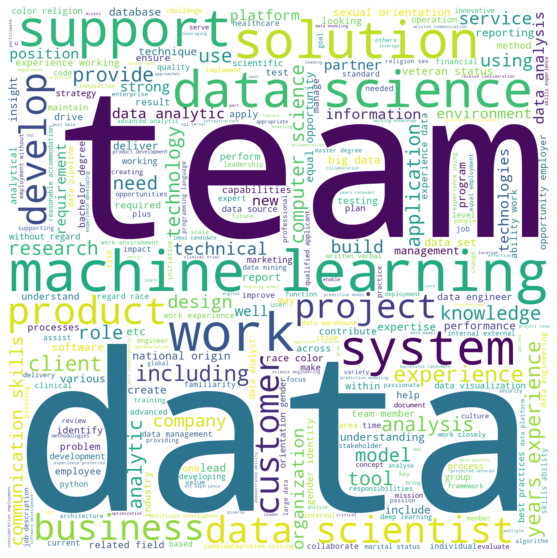

In [111]:
words = ' '.join(df['Job Description'])

def punctuation(text):
    # Removing punctuations and Stopwords
    filtered = []
    stop_words  = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for i in word_tokens:
        if i not in stop_words and i.isalpha():
            filtered.append(i.lower())
    return filtered

words_filtered = punctuation(words)

text = ' '.join([ele for ele in words_filtered])
wc = WordCloud(background_color='white',random_state=1,stopwords=STOPWORDS,max_words =300, width=1500,height =1500)
wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()